In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [318]:
train_data = pd.read_csv('train_features.csv')
test_data = pd.read_csv('test_features.csv')

train_data.set_index("id", inplace=True)
test_data.set_index("id", inplace=True)

## Outliers

In [319]:
outliers = train_data[train_data['playtime_forever']>20]

print('Total number of outliers: ', outliers.shape[0])
outlier_index = outliers.index

Total number of outliers:  16


In [320]:
train_data.loc[outlier_index, :]

,playtime_forever,price,total_positive_reviews,total_negative_reviews,purchase_year,purchase_month,release_year,release_month,wait_until_buy,Num of genres,...,Violent.1,Walking Simulator,reviews,positive_negative_ratio,genres_popularity_scores,categories_popularity_scores,gen_cat_popularity_scores,genres_rare_scores,categories_rare_scores,gen_cat_rare_scores
id,,,,,,,,,,,,,,,,,,,,,
4,22.333333,4800.0,8841.0,523.0,2018,3,2012,7,2043,3,...,0,0,9364.0,16.872137,3.850704,4.036620,7.887324,18.962147,23.312385,42.274531
13,20.566667,3300.0,9659.0,1058.0,2016,10,2016,8,39,4,...,0,0,10717.0,9.120869,4.109859,4.704225,8.814085,16.878879,173.355779,190.234659
36,56.666667,12900.0,18644.0,7748.0,2017,12,2018,5,-151,6,...,1,0,26392.0,2.405988,3.988732,3.929577,7.918310,99.711828,44.169141,143.880969
90,32.766667,9900.0,68660.0,27235.0,2017,12,2015,11,759,1,...,0,0,95895.0,2.520928,2.197183,2.740845,4.938028,14.670186,6.389695,21.059881
133,49.383333,30800.0,56368.0,20286.0,2018,8,2018,8,3,1,...,0,0,76654.0,2.778528,2.208451,4.160563,6.369014,7.782031,43.525611,51.307642
163,51.283333,3600.0,221277.0,6414.0,2017,5,2011,5,2204,4,...,0,0,227691.0,34.493687,4.109859,4.397183,8.507042,16.878879,38.970658,55.849538
167,24.933333,0.0,785.0,84.0,2015,9,2015,5,127,7,...,0,0,869.0,9.235294,4.997183,3.388732,8.385915,81.334712,47.968973,129.303685
197,92.633333,13300.0,47530.0,2488.0,2017,12,2017,9,81,3,...,0,0,50018.0,19.096022,3.042254,4.918310,7.960563,18.760322,123.040777,141.801100
221,31.983333,5000.0,1651.0,382.0,2017,3,2015,10,506,2,...,0,0,2033.0,4.310705,2.630986,2.985915,5.616901,18.786047,5.511382,24.297429


## Standardization

In [321]:
from sklearn.preprocessing import StandardScaler

transform_scaler = {}

transform_col = ['price', 'total_positive_reviews', 'total_negative_reviews', \
                 'reviews', 'Num of genres', 'Num of categories', 'Num of tags'\
                , 'purchase_year', 'purchase_month', 'release_year', 'release_month'\
                 , 'wait_until_buy', 'genres_popularity_scores', 'categories_popularity_scores'\
                 , 'gen_cat_popularity_scores', 'positive_negative_ratio', 'genres_rare_scores'\
                , 'categories_rare_scores', 'gen_cat_rare_scores']

for col in transform_col:
    scaler = StandardScaler()
    transform_scaler[col] = scaler.fit(train_data[[col]])
    
def standardize(data):
    for col in transform_col:
        data[col] = transform_scaler[col].transform(data[[col]])

In [322]:
# standardize(train_data)
# standardize(test_data)

In [323]:
train_data.head()

,playtime_forever,price,total_positive_reviews,total_negative_reviews,purchase_year,purchase_month,release_year,release_month,wait_until_buy,Num of genres,...,Violent.1,Walking Simulator,reviews,positive_negative_ratio,genres_popularity_scores,categories_popularity_scores,gen_cat_popularity_scores,genres_rare_scores,categories_rare_scores,gen_cat_rare_scores
id,,,,,,,,,,,,,,,,,,,,,
0,0.000000,3700.0,372.0,96.0,2018,7,2013,12,1665,3,...,0,1,468.0,3.835052,2.645070,2.236620,4.881690,22.819298,4.176795,26.996093
1,0.016667,0.0,23.0,0.0,2016,11,2015,8,472,1,...,0,0,23.0,23.000000,0.718310,1.140845,1.859155,21.037287,6.505656,27.542943
2,0.000000,5000.0,3018.0,663.0,2018,7,2014,1,1616,3,...,0,0,3681.0,4.545181,2.645070,2.656338,5.301408,22.819298,6.559346,29.378644
3,1.533333,9900.0,63078.0,1746.0,2016,11,2010,3,2434,2,...,0,0,64824.0,36.106468,3.625352,2.805634,6.430986,20.394853,14.190257,34.585109
4,22.333333,4800.0,8841.0,523.0,2018,3,2012,7,2043,3,...,0,0,9364.0,16.872137,3.850704,4.036620,7.887324,18.962147,23.312385,42.274531


## Basic plots

In [324]:
# import seaborn as sns
# # sns.pairplot(train_data[["playtime_forever", "total_positive_reviews", "total_negative_reviews", \
# #                          "purchase_year", "purchase_month", "release_year", "release_month"\
# #                         ,"reviews", "Num of genres", "Num of categories", "Num of tags"]], diag_kind="kde")

# sns.pairplot(train_data[["playtime_forever", "total_positive_reviews", "total_negative_reviews", \
#                          'price', 'genres_popularity_scores', 'categories_popularity_scores']], diag_kind="kde")

In [325]:
# sns.pairplot(test_data[["total_positive_reviews", "total_negative_reviews"\
#                          , 'price'\
#                         , 'genres_popularity_scores', 'categories_popularity_scores']], diag_kind="kde")

### Modeling and Prediction

In [326]:
#Set the parameters by cross-validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

features = ['price', 'total_positive_reviews', 'total_negative_reviews',
            'purchase_year', 'purchase_month', 'release_year', 'release_month',
            'Num of genres', 'Num of categories', 'Num of tags', 
            'wait_until_buy', 'reviews', 'genres_popularity_scores', 'categories_popularity_scores',\
            'positive_negative_ratio', 'gen_cat_popularity_scores', 'genres_rare_scores',\
            'categories_rare_scores', 'gen_cat_rare_scores']

genres_col = ['Gore',
            'Nudity',
            'Simulation',
            'Free to Play',
            'Massively Multiplayer',
            'Strategy',
            'Indie',
            'Violent',
            'Adventure',
            'Action',
            'Casual',
            'RPG',
            'Sports',
            'Early Access']

categories_col = ['Captions available',
                'Co-op',
                'Steam Workshop',
                'Steam Cloud',
                'Stats',
                'Includes level editor',
                'Steam Leaderboards',
                'Remote Play on Tablet',
                'Commentary available',
                'Steam Achievements',
                'VR Support',
                'Multi-player',
                'Online Co-op',
                'Steam Trading Cards',
                'Partial Controller Support',
                'Local Multi-Player',
                'Local Co-op',
                'Full controller support',
                'Cross-Platform Multiplayer',
                'Remote Play on Phone',
                'Remote Play on TV',
                'SteamVR Collectibles',
                'MMO',
                'In-App Purchases',
                'Online Multi-Player',
                'Single-player',
                'Shared/Split Screen',
                'Includes Source SDK']

tags_col = ['2D', 'Action', 'Action RPG', 'Adventure', 'Atmospheric',
       'Building', 'Casual', 'Character Customization', 'Choices Matter',
       'Classic', 'Co-op', 'Comedy', 'Controller', 'Crafting', 'Dark',
       'Difficult', 'Early Access', 'Exploration', 'FPS', 'Fantasy',
       'Female Protagonist', 'First-Person', 'Free to Play', 'Funny',
       'Gore', 'Great Soundtrack', 'Hack and Slash', 'Historical',
       'Horror', 'Indie', 'Isometric', 'Local Co-Op',
       'Massively Multiplayer', 'Masterpiece', 'Mature', 'Moddable',
       'Multiplayer', 'Mystery', 'Nudity', 'Online Co-Op', 'Open World',
       'Pixel Graphics', 'Platformer', 'Point & Click',
       'Post-apocalyptic', 'Psychological Horror', 'Puzzle', 'RPG', 'RTS',
       'Replay Value', 'Retro', 'Rogue-like', 'Sandbox', 'Sci-fi',
       'Shooter', 'Short', 'Simulation', 'Singleplayer', 'Space',
       'Stealth', 'Story Rich', 'Strategy', 'Survival', 'Tactical',
       'Third Person', 'Third-Person Shooter', 'Turn-Based',
       'Turn-Based Strategy', 'VR', 'Violent', 'Walking Simulator', 'Sports']

features = features+genres_col+categories_col+tags_col

In [327]:
print('Total number of features: ', len(features))

Total number of features:  133


### Random Forest Regressor

In [328]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

X_train = train_data[features]
y_train = train_data['playtime_forever']

In [329]:
# rfr = RandomForestRegressor(random_state=45, criterion='mse', n_estimators=700)
# selector = RFE(rfr, 52, step=1)
# selector = selector.fit(X_train, y_train)

# important_features = [k for k, v in iter(zip(X_train.columns, selector.support_)) if v==True]
# # important_features
# X_train = train_data[important_features]

In [330]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
rfr = RandomForestRegressor(random_state=7, criterion='mse', n_estimators=1000, min_samples_leaf=5, min_samples_split=2)

param_grid = {'max_features': ['auto', 'sqrt'],
            'max_depth' : [7, 8, 9, 10]}
searcher = GridSearchCV(rfr, param_grid, cv=4, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')

searcher.fit(X_train, y_train)
print(searcher.best_params_) # {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 5}, features=52
print(math.sqrt(-1*searcher.best_score_)) # 10.355469186851387

rfr_score = math.sqrt(-1*searcher.best_score_)
best_rfr = searcher.best_estimator_

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   23.5s finished
/Users/Oscar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 10, 'max_features': 'sqrt'}
10.48523171103638


In [331]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(searcher.best_estimator_, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
np.sqrt(-1*cv_results)

array([ 6.41330017,  6.70344152, 10.69163317, 15.51946225])

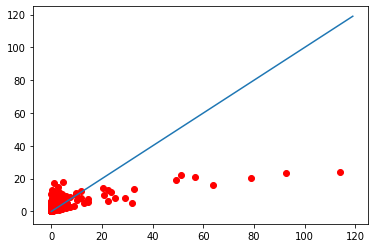

In [332]:
yhead = searcher.best_estimator_.predict(X_train)
plt.plot(range(120), range(120))

result = pd.DataFrame({'y': train_data['playtime_forever'], 'yhead':yhead})
plt.scatter(result['y'], result['yhead'], color='red')

### K-Nearest Neighbors Regressor

In [333]:
from sklearn.neighbors import KNeighborsRegressor

X_train = train_data[features]
y_train = train_data['playtime_forever']
knr = KNeighborsRegressor()


param_grid = {'weights': ['uniform', 'distance'],
        'leaf_size': range(5, 50, 5),
        'n_neighbors': range(5, 50, 5)
        }

searcher = GridSearchCV(knr, param_grid, cv=4, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')

searcher.fit(X_train, y_train)
print(searcher.best_params_) # {'leaf_size': 5, 'n_neighbors': 40, 'weights': 'uniform'}
print(math.sqrt(-1*searcher.best_score_)) # 10.509046309322029

knr_score = math.sqrt(-1*searcher.best_score_)
best_knr = searcher.best_estimator_

Fitting 4 folds for each of 162 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'leaf_size': 5, 'n_neighbors': 40, 'weights': 'uniform'}
10.50904439365823


[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:    2.2s finished
/Users/Oscar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [334]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(searcher.best_estimator_, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
np.sqrt(-1*cv_results)

array([ 7.20229211,  6.87821625, 10.58184909, 15.23046713])

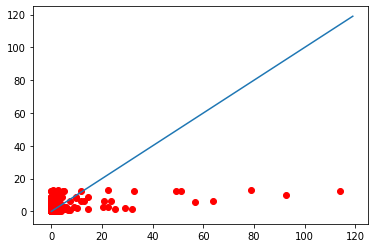

In [335]:
yhead = searcher.best_estimator_.predict(X_train)
plt.plot(range(120), range(120))

result = pd.DataFrame({'y': train_data['playtime_forever'], 'yhead':yhead})
plt.scatter(result['y'], result['yhead'], color='red')

### Gradient Boosting

In [336]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
X_train = train_data[features]
y_train = train_data['playtime_forever']
gbr = GradientBoostingRegressor(criterion='friedman_mse', subsample=1, min_samples_split=2, min_samples_leaf=1, max_depth=5, n_estimators=1000)

In [337]:
# selector = RFE(gbr, 54, step=1)
# selector = selector.fit(X_train, y_train)
# important_features = [k for k, v in iter(zip(X_train.columns, selector.support_)) if v==True]
# # important_features
# X_train = train_data[important_features]

In [338]:
param_grid = {#'n_estimators': [250, 500],
             'loss' : ['ls', 'lad', 'huber', 'quantile']}


searcher = GridSearchCV(gbr, param_grid, cv=4, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
searcher.fit(X_train, y_train)

print(searcher.best_params_) # {'loss': 'lad', 'n_estimators': 250}
print(math.sqrt(-1*searcher.best_score_)) # 10.080181868555064

gbr_score = math.sqrt(-1*searcher.best_score_)
best_gbr = searcher.best_estimator_

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   14.4s finished
/Users/Oscar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'loss': 'lad'}
10.656109452292025


In [339]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(searcher.best_estimator_, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
np.sqrt(-1*cv_results)

array([ 7.80081586,  6.26398366, 10.74941699, 14.8788962 ])

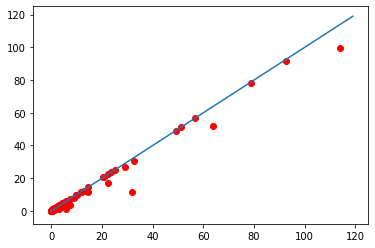

In [340]:
yhead = searcher.best_estimator_.predict(X_train)
plt.plot(range(120), range(120))

result = pd.DataFrame({'y': train_data['playtime_forever'], 'yhead':yhead})
plt.scatter(result['y'], result['yhead'], color='red')

### Adaboost

In [341]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostRegressor
X_train = train_data[features]
y_train = train_data['playtime_forever']
abr = AdaBoostRegressor(random_state=21, n_estimators=1000)

In [342]:
# selector = RFE(abr, 54, step=1)
# selector = selector.fit(X_train, y_train)
# important_features = [k for k, v in iter(zip(X_train.columns, selector.support_)) if v==True]
# # important_features
# X_train = train_data[important_features]

In [343]:
param_grid = {'loss': ['linear', 'square', 'exponential']}


searcher = GridSearchCV(abr, param_grid, cv=4, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
searcher.fit(X_train, y_train)

print(searcher.best_params_) # {'loss': 'square', 'n_estimators': 500}
print(math.sqrt(-1*searcher.best_score_ )) # 11.236898649872709

abr_score = math.sqrt(-1*searcher.best_score_)
best_abr = searcher.best_estimator_

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.5s finished
/Users/Oscar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'loss': 'square'}
11.322951385895285


In [344]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(searcher.best_estimator_, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
np.sqrt(-1*cv_results)

array([ 8.96574326,  7.44916347, 10.8359456 , 16.15664118])

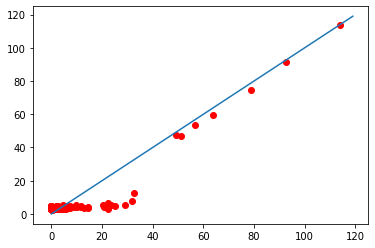

In [345]:
yhead = searcher.best_estimator_.predict(X_train)
plt.plot(range(120), range(120))

result = pd.DataFrame({'y': train_data['playtime_forever'], 'yhead':yhead})
plt.scatter(result['y'], result['yhead'], color='red')

# Testing stage

In [346]:
scores = {'rfr_score': rfr_score, 'knr_score': knr_score, 'gbr_score': gbr_score, 'abr_score': abr_score}
scores

{'rfr_score': 10.48523171103638,
 'knr_score': 10.50904439365823,
 'gbr_score': 10.656109452292025,
 'abr_score': 11.322951385895285}

In [347]:
y_predict_rfr = best_rfr.predict(test_data[features])
y_predict_knr = best_knr.predict(test_data[features])
y_predict_gbr = best_gbr.predict(test_data[features])
y_predict_abr = best_abr.predict(test_data[features])

In [348]:
def print_result(index):    
    print(y_predict_rfr[index])
    print(y_predict_knr[index])
    print(y_predict_gbr[index])
    print(y_predict_abr[index])
    
print_result(31)

8.887814941973216
12.588750000000001
6.329122983665602
4.037637969094933


Text(0.5, 1, 'AdaBoost Regressor')

<Figure size 2160x288 with 0 Axes>

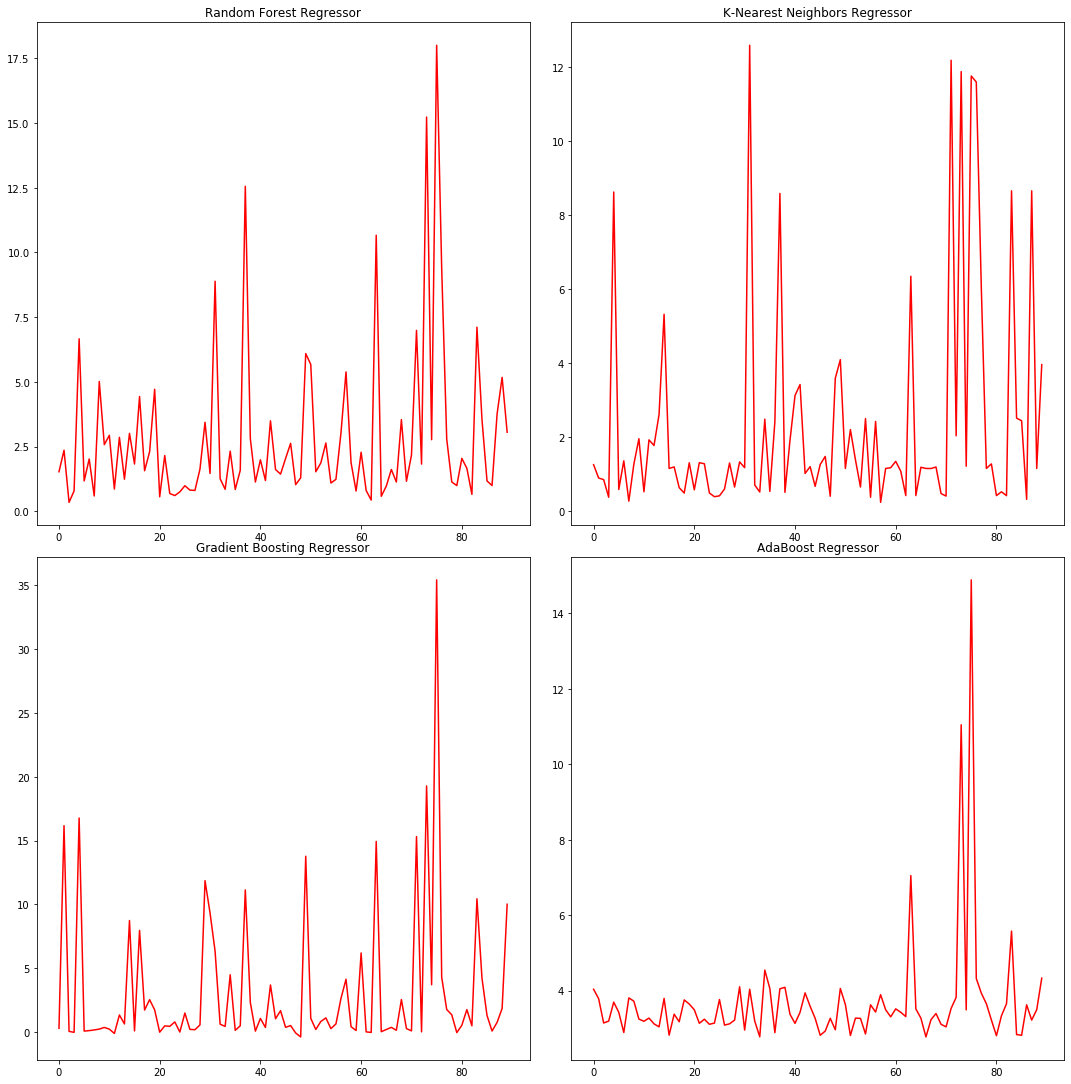

In [349]:
plt.figure(figsize=(30,4))
fig, axs = plt.subplots(2, 2, figsize=(15,15))
plt.tight_layout()



axs[0,0].plot(y_predict_rfr, color='red')
axs[0,0].set_title('Random Forest Regressor')

axs[0,1].plot(y_predict_knr, color='red')
axs[0,1].set_title('K-Nearest Neighbors Regressor')


axs[1,0].plot(y_predict_gbr, color='red')
axs[1,0].set_title('Gradient Boosting Regressor')


axs[1,1].plot(y_predict_abr, color='red')
axs[1,1].set_title('AdaBoost Regressor')

In [350]:
test_data.head(4)

,price,total_positive_reviews,total_negative_reviews,purchase_year,purchase_month,release_year,release_month,wait_until_buy,Num of genres,Num of categories,...,Violent.1,Walking Simulator,reviews,positive_negative_ratio,genres_popularity_scores,categories_popularity_scores,gen_cat_popularity_scores,genres_rare_scores,categories_rare_scores,gen_cat_rare_scores
id,,,,,,,,,,,,,,,,,,,,,
0,3500,2607.0,1122.0,2018,10,2012,5,2350,2,2,...,0,0,3729.0,2.321460,2.360563,1.377465,3.738028,6.980610,3.426668,10.407278
1,11600,5762.0,2235.0,2019,7,2018,4,452,3,7,...,0,0,7997.0,2.576923,3.270423,3.492958,6.763380,17.238846,27.996578,45.235424
2,2100,687.0,133.0,2019,7,2017,3,848,3,3,...,0,0,820.0,5.126866,2.064789,2.371831,4.436620,20.818124,3.882941,24.701066
3,3600,67.0,39.0,2018,1,2007,7,3850,2,3,...,0,0,106.0,1.675000,1.636620,1.439437,3.076056,11.244142,9.669437,20.913579


In [351]:
submission = pd.DataFrame({'id': range(90), 'playtime_forever': y_predict_rfr})

In [352]:
submission

,id,playtime_forever
0,0,1.530009
1,1,2.360024
2,2,0.348227
3,3,0.790049
4,4,6.664546
5,5,1.175171
6,6,2.022658
7,7,0.593992
8,8,5.016496
9,9,2.576415


In [353]:
submission.to_csv('submission.csv', index=False)